Name: Harshith Akkapelli

Task-4: Images Dataset

Dataset: [Shapes Dataset](https://www.kaggle.com/datasets/cactus3/basicshapes/data)

### **Load the Dataset**

In [ ]:
import zipfile
import os
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# File path
zip_file_path = '/content/shapes.zip'
extracted_folder_path = '/content/shapes'

# Unzipping the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Checking the contents of the extracted folder
extracted_files = list(Path(extracted_folder_path).rglob('*.*'))
extracted_directories = {file.parent.name for file in extracted_files}
extracted_directories


{'circles', 'squares', 'triangles'}

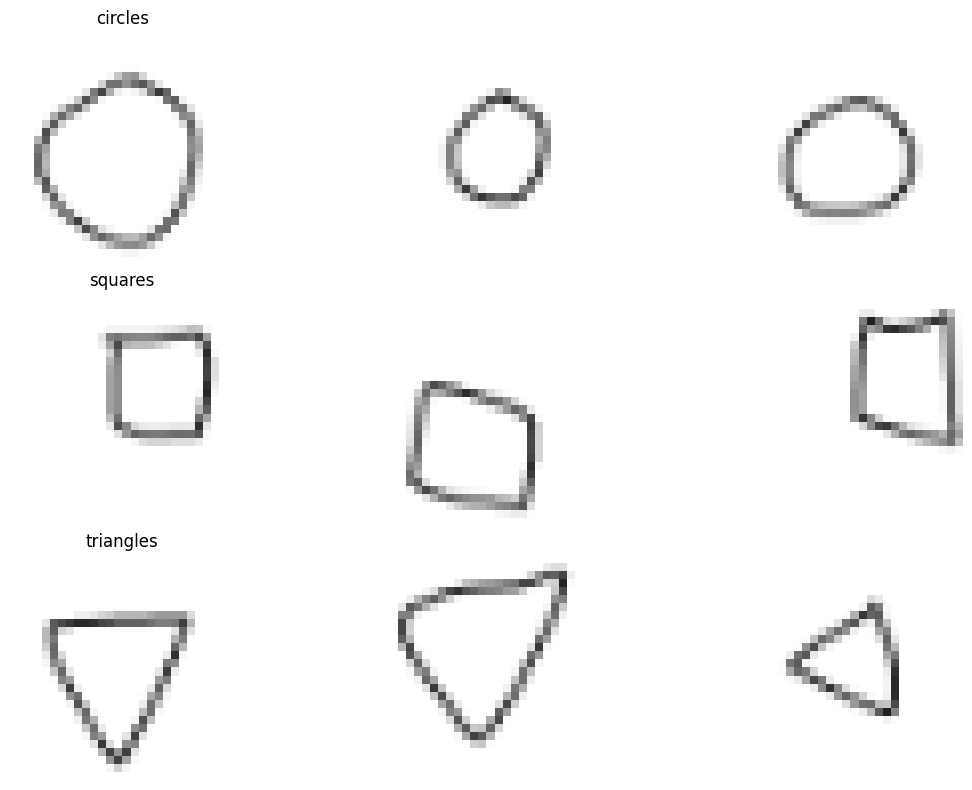

In [ ]:
def load_images_from_folder(folder, num_images=3):
    """Load a specific number of images from a given folder."""
    images = []
    for img_path in Path(folder).glob('*.png'):
        if len(images) < num_images:
            img = Image.open(img_path)
            images.append(img)
        else:
            break
    return images

# Load sample images from each category
num_samples = 3
sample_images = {category: load_images_from_folder(os.path.join(extracted_folder_path, category), num_samples)
                 for category in extracted_directories}

# Display sample images
fig, axes = plt.subplots(nrows=len(sample_images), ncols=num_samples, figsize=(12, 8))

for i, (category, images) in enumerate(sample_images.items()):
    for j, img in enumerate(images):
        ax = axes[i, j]
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        if j == 0:
            ax.set_title(category)

plt.tight_layout()
plt.show()


### **EDA**

In [ ]:
def check_image_sizes_and_count(folder):
    """Check the sizes of images in the folder and count the number of images."""
    image_sizes = set()
    image_count = 0
    for img_path in Path(folder).glob('*.png'):
        with Image.open(img_path) as img:
            image_sizes.add(img.size)
        image_count += 1
    return image_sizes, image_count

# Checking image sizes and counts for each category
image_info = {category: check_image_sizes_and_count(os.path.join(extracted_folder_path, category))
              for category in extracted_directories}

image_info


{'circles': ({(28, 28)}, 100),
 'squares': ({(28, 28)}, 100),
 'triangles': ({(28, 28)}, 100)}

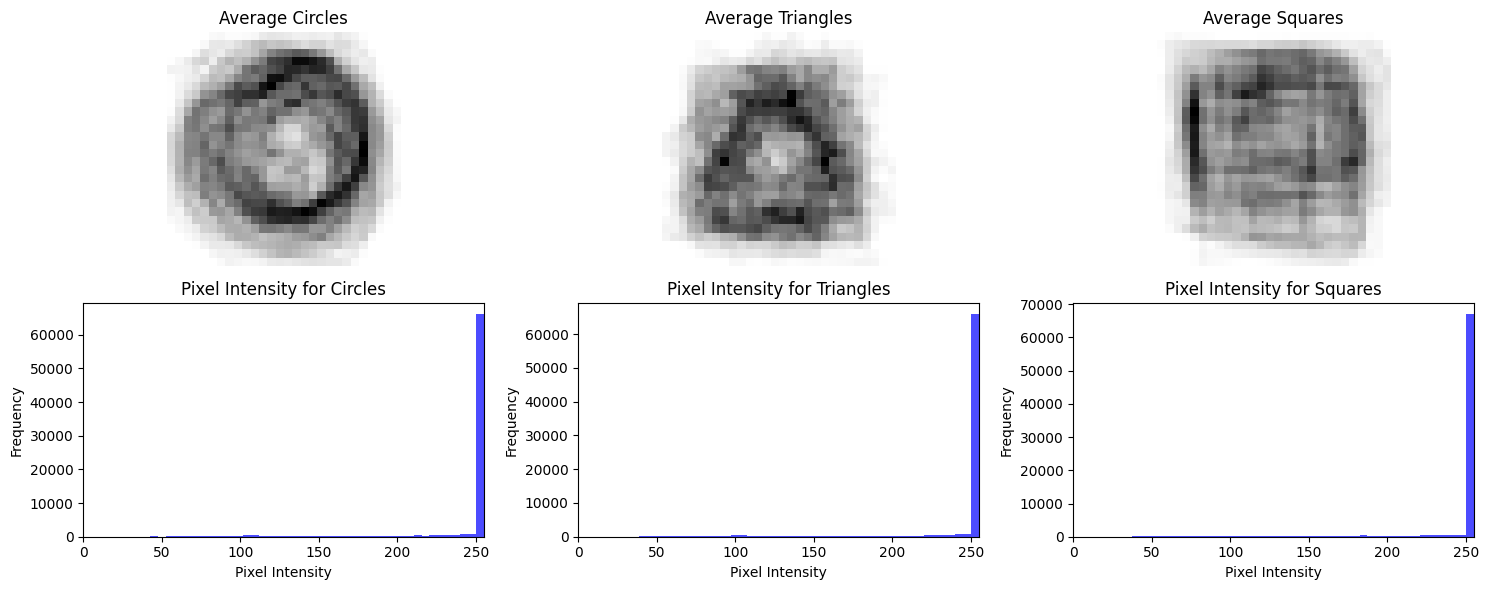

In [ ]:
import zipfile
import os
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Re-extracting and reprocessing the dataset

# Paths
zip_file_path = '/content/shapes.zip'
extracted_folder_path = '/content/shapes'

# Unzipping the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Redefining the function to load images and labels
def load_images_and_labels(categories, base_path):
    images = []
    labels = []
    label_dict = {category: i for i, category in enumerate(categories)}

    for category in categories:
        folder_path = os.path.join(base_path, category)
        label = label_dict[category]
        for img_path in Path(folder_path).glob('*.png'):
            with Image.open(img_path) as img:
                img_array = np.array(img.convert('L'))
                images.append(img_array)
                labels.append(label)

    return np.array(images), np.array(labels)

# Load images and labels
categories = os.listdir(extracted_folder_path)
images, labels = load_images_and_labels(categories, extracted_folder_path)

# Correcting the calculation of average images for each class and replotting

average_images = {}
for category in categories:
    # Filtering images by category
    category_index = categories.index(category)
    category_images = images[labels == category_index]
    # Calculating the average image
    average_image = np.mean(category_images, axis=0)
    average_images[category] = average_image

# Plotting average images and pixel intensity distributions
fig, axes = plt.subplots(2, len(categories), figsize=(15, 6))

# Plotting average images
for i, category in enumerate(categories):
    ax = axes[0, i]
    ax.imshow(average_images[category], cmap='gray')
    ax.set_title(f"Average {category.capitalize()}")
    ax.axis('off')

# Plotting pixel intensity distributions
for i, category in enumerate(categories):
    ax = axes[1, i]
    category_index = categories.index(category)
    category_images_flat = images[labels == category_index].reshape(-1)
    ax.hist(category_images_flat, bins=50, color='blue', alpha=0.7)
    ax.set_title(f"Pixel Intensity for {category.capitalize()}")
    ax.set_xlim([0, 255])
    ax.set_xlabel("Pixel Intensity")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()



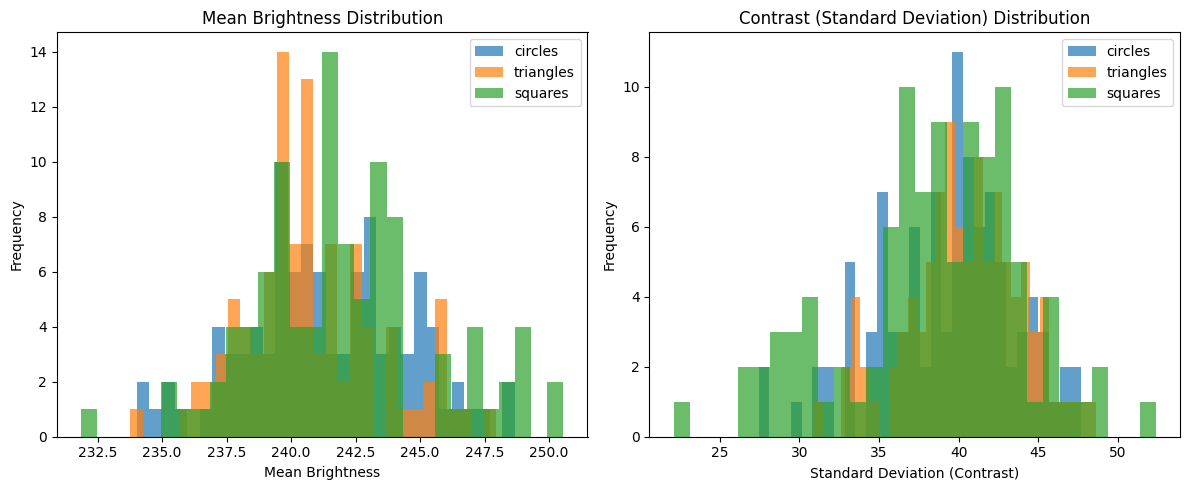

In [ ]:
import pandas as pd
mean_brightness = []
std_contrast = []

for img in images:
    mean_brightness.append(np.mean(img))
    std_contrast.append(np.std(img))

# Converting lists to numpy arrays for easier processing
mean_brightness = np.array(mean_brightness)
std_contrast = np.array(std_contrast)

# Organizing the data for plotting
brightness_contrast_df = pd.DataFrame({
    'Mean Brightness': mean_brightness,
    'Standard Deviation (Contrast)': std_contrast,
    'Label': labels
})

# Recreating the DataFrame with the brightness and contrast data
brightness_contrast_df = pd.DataFrame({
    'Mean Brightness': mean_brightness,
    'Standard Deviation (Contrast)': std_contrast,
    'Label': labels
})

# Plotting mean brightness and standard deviation for each class
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Mean Brightness
for label in np.unique(labels):
    ax[0].hist(brightness_contrast_df[brightness_contrast_df['Label'] == label]['Mean Brightness'], bins=30, alpha=0.7, label=categories[label])
ax[0].set_title('Mean Brightness Distribution')
ax[0].set_xlabel('Mean Brightness')
ax[0].set_ylabel('Frequency')
ax[0].legend()

# Standard Deviation (Contrast)
for label in np.unique(labels):
    ax[1].hist(brightness_contrast_df[brightness_contrast_df['Label'] == label]['Standard Deviation (Contrast)'], bins=30, alpha=0.7, label=categories[label])
ax[1].set_title('Contrast (Standard Deviation) Distribution')
ax[1].set_xlabel('Standard Deviation (Contrast)')
ax[1].set_ylabel('Frequency')
ax[1].legend()

plt.tight_layout()
plt.show()


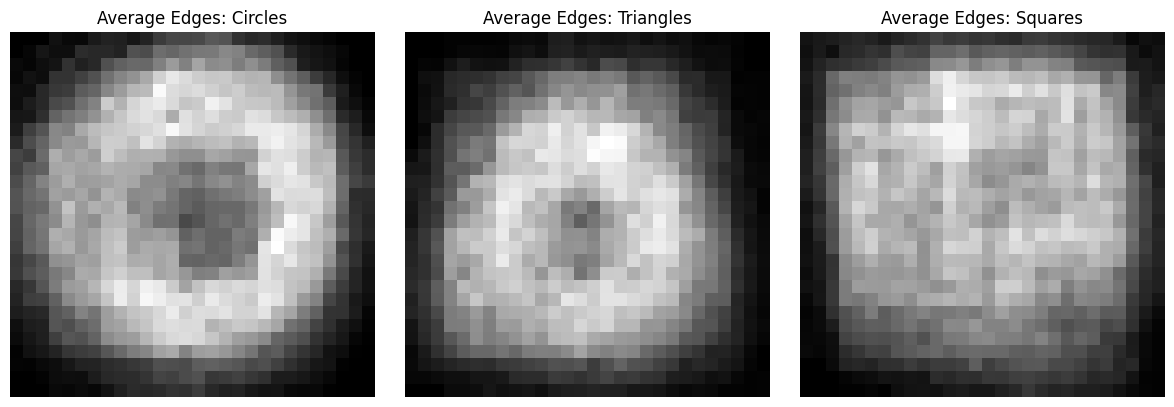

In [ ]:
from scipy.ndimage import sobel
# Converting the normalized edge-detected images to 8-bit unsigned integers for plotting
# Function to apply Sobel filter for edge detection
def apply_sobel_filter(images):
    edge_images = []
    for img in images:
        # Applying Sobel filter along both axes
        dx = sobel(img, axis=0)
        dy = sobel(img, axis=1)
        # Combining the two directions
        edge_image = np.hypot(dx, dy)
        edge_images.append(edge_image)
    return np.array(edge_images)

# Applying Sobel filter to the images
edge_detected_images = apply_sobel_filter(images)
# Function to normalize and convert images
def normalize_and_convert(images):
    normalized_images = []
    for img in images:
        # Normalizing to the range [0, 1]
        normalized_image = img / np.max(img)
        normalized_images.append(normalized_image)
    return np.array(normalized_images)

# Normalizing and converting the edge-detected images
normalized_edge_images = normalize_and_convert(edge_detected_images)

converted_edge_images = (normalized_edge_images * 255).astype(np.uint8)

# Recalculating the average edge detected images for each class with the converted format
average_edges_converted = {}
for category in categories:
    category_index = categories.index(category)
    category_edge_images = converted_edge_images[labels == category_index]
    average_edge_image = np.mean(category_edge_images, axis=0)
    average_edges_converted[category] = average_edge_image

# Replotting with the converted images
fig, axes = plt.subplots(1, len(categories), figsize=(12, 4))
for i, category in enumerate(categories):
    ax = axes[i]
    ax.imshow(average_edges_converted[category], cmap='gray')
    ax.set_title(f"Average Edges: {category.capitalize()}")
    ax.axis('off')

plt.tight_layout()
plt.show()


### **Data Preprocessing**

In [ ]:
# Redefining the load_images_and_labels function and reprocessing the dataset

def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]
def load_images_and_labels(categories, base_path):
    images = []
    labels = []
    label_dict = {category: i for i, category in enumerate(categories)}

    for category in categories:
        folder_path = os.path.join(base_path, category)
        label = label_dict[category]
        for img_path in Path(folder_path).glob('*.png'):
            with Image.open(img_path) as img:
                # Converting image to grayscale and then to numpy array
                img_array = np.array(img.convert('L'))
                images.append(img_array)
                labels.append(label)

    return np.array(images), np.array(labels)

# Load images and labels
categories = list(extracted_directories)
num_classes = len(categories)

images, labels = load_images_and_labels(categories, extracted_folder_path)

# Normalize the pixel values
images_normalized = images / 255.0

# Reshape images array for model input (flattening)
images_flattened = images_normalized.reshape(images_normalized.shape[0], -1)

# One-hot encode the labels manually
labels_encoded = one_hot_encode(labels, num_classes)

# Checking the shapes of the arrays
images_flattened.shape, labels_encoded.shape
data_df = pd.DataFrame(images_flattened)
data_df['label'] = labels

data_df.head()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


### **Clustering and Anamoly Detection**

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Performing K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(images_flattened)

# Mapping clusters to original labels to see the distribution
cluster_labels = pd.DataFrame({'True Label': labels, 'Cluster': clusters})

# Counting the number of each true label in each cluster
cluster_distribution = cluster_labels.groupby(['Cluster', 'True Label']).size().unstack(fill_value=0)
cluster_distribution


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


True Label,0,1,2
Cluster,,,
0,36,35,10
1,36,32,57
2,28,33,33


In [ ]:
from scipy.spatial.distance import cdist

# Calculate the distance of each image to the center of its cluster
distances = cdist(images_flattened, kmeans.cluster_centers_, 'euclidean')
# Assign each image the distance to its own cluster center
cluster_distances = distances[np.arange(len(clusters)), clusters]

# Identifying potential anomalies (farthest images in each cluster)
anomalies = pd.DataFrame({
    'True Label': labels,
    'Cluster': clusters,
    'Distance to Cluster Center': cluster_distances
})

# Finding the top anomalies (images farthest from cluster centers) in each cluster
top_anomalies_per_cluster = anomalies.sort_values('Distance to Cluster Center', ascending=False).groupby('Cluster').head(3)
top_anomalies_per_cluster


,True Label,Cluster,Distance to Cluster Center
172,1,1,5.607985
134,1,0,5.565509
41,0,0,5.430882
204,2,1,5.373003
76,0,1,5.175176
110,1,0,5.165276
285,2,2,5.061079
252,2,2,4.882755
162,1,2,4.788427


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from pathlib import Path
import os
from PIL import Image

# Since the code execution state has reset, I'll need to reload and reprocess the images quickly.

# Redefining necessary functions and variables
def load_images_and_labels(categories, base_path):
    images = []
    labels = []
    label_dict = {category: i for i, category in enumerate(categories)}

    for category in categories:
        folder_path = os.path.join(base_path, category)
        label = label_dict[category]
        for img_path in Path(folder_path).glob('*.png'):
            with Image.open(img_path) as img:
                # Converting image to grayscale and then to numpy array
                img_array = np.array(img.convert('L'))
                images.append(img_array)
                labels.append(label)

    return np.array(images), np.array(labels)

# Load images and labels
extracted_folder_path = '/content/shapes'
categories = ['circles', 'squares', 'triangles']
images, labels = load_images_and_labels(categories, extracted_folder_path)

# Normalize and flatten the images
images_normalized = images / 255.0
images_flattened = images_normalized.reshape(images_normalized.shape[0], -1)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(images_flattened)

# Calculate the distance of each image to the center of its cluster
distances = cdist(images_flattened, kmeans.cluster_centers_, 'euclidean')
# Assign each image the distance to its own cluster center
cluster_distances = distances[np.arange(len(clusters)), clusters]

# Identifying potential anomalies (farthest images in each cluster)
anomalies = pd.DataFrame({
    'True Label': labels,
    'Cluster': clusters,
    'Distance to Cluster Center': cluster_distances
})

# Finding the top anomalies (images farthest from cluster centers) in each cluster
top_anomalies_per_cluster = anomalies.sort_values('Distance to Cluster Center', ascending=False).groupby('Cluster').head(3)
top_anomalies_per_cluster


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,True Label,Cluster,Distance to Cluster Center
172,1,1,5.607985
134,1,0,5.565509
41,0,0,5.430882
204,2,1,5.373003
76,0,1,5.175176
110,1,0,5.165276
285,2,2,5.061079
252,2,2,4.882755
162,1,2,4.788427


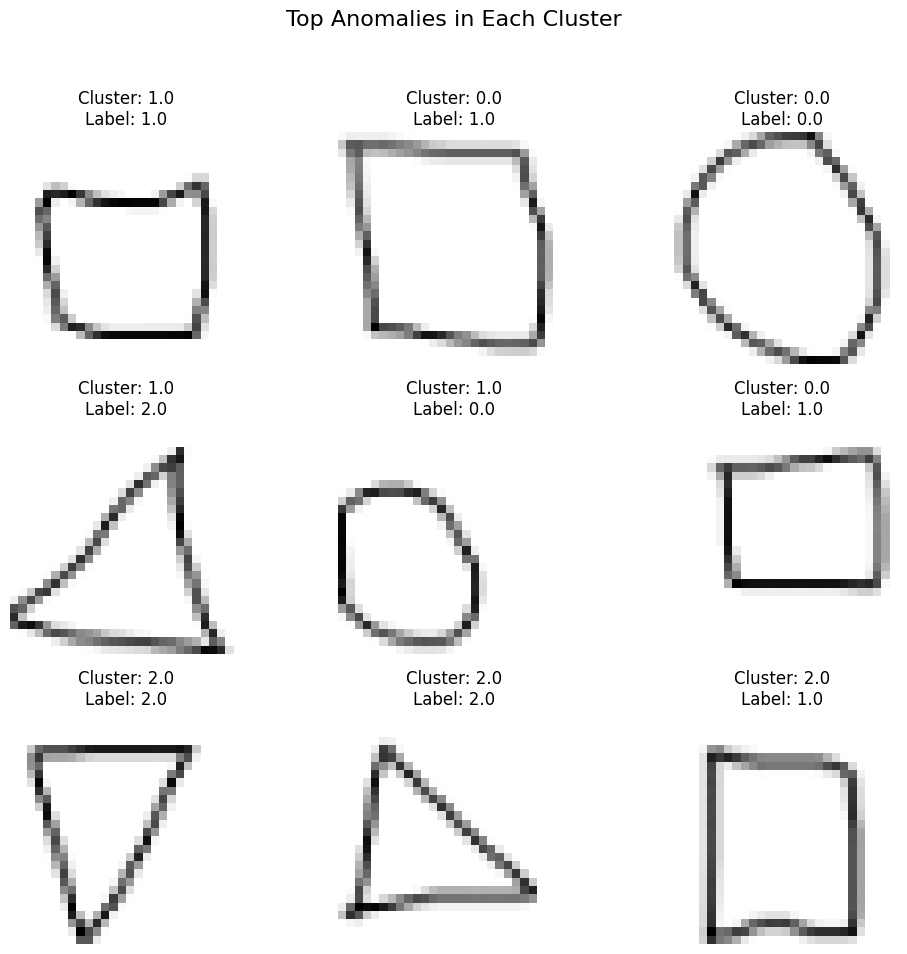

In [ ]:
import matplotlib.pyplot as plt

# Function to plot images and their predicted clusters
def plot_anomalies(anomalies_df, images_array, num_rows=3, num_cols=3):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    fig.suptitle('Top Anomalies in Each Cluster', fontsize=16)

    for i in range(num_rows):
        for j in range(num_cols):
            ax = axes[i, j]
            # Extracting the index of the image to display from the anomalies dataframe
            idx = anomalies_df.iloc[i * num_cols + j].name
            ax.imshow(images_array[idx], cmap='gray')
            ax.set_title(f"Cluster: {anomalies_df.iloc[i * num_cols + j]['Cluster']}\nLabel: {anomalies_df.iloc[i * num_cols + j]['True Label']}")
            ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plotting the anomalies
plot_anomalies(top_anomalies_per_cluster, images)


### **Auto ML**

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 81.5 MB/s e

In [ ]:
!pip uninstall scipy
!pip install scipy

Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scipy-1.10.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-41284840.3.18.so
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/scipy/*
Proceed (Y/n)? y
  Successfully uninstalled scipy-1.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 4.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.1.0 requires scipy~=1.10.1, but you have sc

In [ ]:
from pycaret.classification import *

# Setup PyCaret
clf = setup(data=data_df, target='label', session_id=123)



,Description,Value
0,Session id,123
1,Target,label
2,Target type,Multiclass
3,Original data shape,"(300, 785)"
4,Transformed data shape,"(300, 785)"
5,Transformed train set shape,"(210, 785)"
6,Transformed test set shape,"(90, 785)"
7,Numeric features,784
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Create models
knn = create_model('knn')
rf = create_model('rf')
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.8503,0.5714,0.7003,0.5139,0.3571,0.3969
1,0.4286,0.7143,0.4286,0.6044,0.3929,0.1429,0.1644
2,0.4762,0.7840,0.4762,0.6928,0.4111,0.2143,0.3083
3,0.4762,0.7568,0.4762,0.5095,0.4312,0.2143,0.2500
4,0.5238,0.6973,0.5238,0.7292,0.4681,0.2857,0.3780
5,0.5238,0.6956,0.5238,0.5500,0.5035,0.2857,0.3062
6,0.5714,0.6956,0.5714,0.6000,0.5721,0.3571,0.3660
7,0.4286,0.7024,0.4286,0.6111,0.4015,0.1429,0.1608
8,0.6667,0.8469,0.6667,0.7659,0.6319,0.5000,0.5488


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6190,0.8214,0.6190,0.6485,0.6111,0.4286,0.4472
1,0.4762,0.7330,0.4762,0.5694,0.5008,0.2143,0.2196
2,0.5714,0.7211,0.5714,0.5194,0.5242,0.3571,0.3741
3,0.5238,0.6888,0.5238,0.5682,0.5208,0.2857,0.2993
4,0.4762,0.6241,0.4762,0.4901,0.4813,0.2143,0.2150
5,0.6190,0.7959,0.6190,0.6389,0.6096,0.4286,0.4392
6,0.5238,0.8112,0.5238,0.5333,0.5166,0.2857,0.2928
7,0.6190,0.8282,0.6190,0.6435,0.6124,0.4286,0.4392
8,0.6190,0.7483,0.6190,0.6270,0.6210,0.4286,0.4300


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.8503,0.6667,0.6627,0.6623,0.5000,0.5017
1,0.5238,0.7041,0.5238,0.5667,0.5329,0.2857,0.2928
2,0.4286,0.7109,0.4286,0.4053,0.4127,0.1429,0.1448
3,0.5714,0.7245,0.5714,0.5862,0.5714,0.3571,0.3621
4,0.4762,0.6259,0.4762,0.5000,0.4774,0.2143,0.2196
5,0.5238,0.7381,0.5238,0.5099,0.5153,0.2857,0.2867
6,0.3810,0.5952,0.3810,0.3873,0.3790,0.0714,0.0724
7,0.3333,0.6429,0.3333,0.3060,0.2889,0.0000,0.0000
8,0.4762,0.6939,0.4762,0.4769,0.4629,0.2143,0.2196


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Blend models
blended = blend_models(estimator_list=[knn, rf, gbc], method='soft')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.8912,0.7619,0.7593,0.7402,0.6429,0.6587
1,0.4762,0.7449,0.4762,0.5917,0.4902,0.2143,0.2244
2,0.5238,0.7789,0.5238,0.5000,0.4823,0.2857,0.3086
3,0.5714,0.7619,0.5714,0.5714,0.5554,0.3571,0.3686
4,0.5238,0.6531,0.5238,0.5386,0.5238,0.2857,0.2897
5,0.5714,0.7483,0.5714,0.5889,0.5679,0.3571,0.3660
6,0.5714,0.7143,0.5714,0.5750,0.5667,0.3571,0.3608
7,0.4286,0.7075,0.4286,0.4055,0.3947,0.1429,0.1513
8,0.6190,0.7925,0.6190,0.6540,0.6092,0.4286,0.4489


Processing:   0%|          | 0/6 [00:00<?, ?it/s]